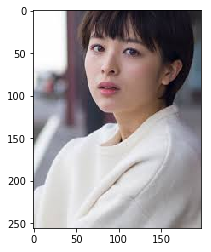

In [9]:
#画像の表示

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('seino.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

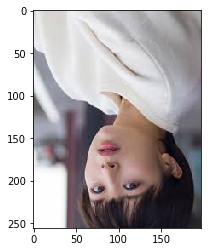

In [10]:
#画像の反転

xAxis = cv2.flip(img, 0)
cv2.imwrite('xAxis.jpg', xAxis)
plt.imshow(xAxis)
plt.show()


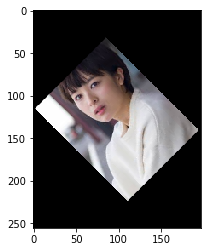

In [25]:
#画像の回転

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('seino.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#高さを定義
height = img.shape[0]                         
#幅を定義
width = img.shape[1]  
#回転の中心を指定                          
center = (int(width/2), int(height/2))

#回転角を指定
angle = 45.0
#スケールを指定
scale = 0.6
#getRotationMatrix2D関数を使用
trans = cv2.getRotationMatrix2D(center, angle , scale)
#アフィン変換
image2 = cv2.warpAffine(img, trans, (width,height))

plt.imshow(image2)
plt.show()

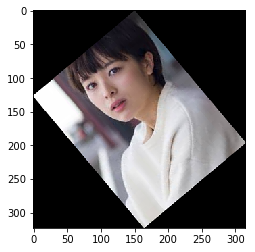

In [37]:
#Affine変換(大きさ合わせる)

import numpy as np

img = cv2.imread('seino.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]
size = (w, h)

# 回転角の指定
angle = 40
angle_rad = angle/180.0*np.pi

# 回転後の画像サイズを計算
w_rot = int(np.round(h*np.absolute(np.sin(angle_rad))+w*np.absolute(np.cos(angle_rad))))
h_rot = int(np.round(h*np.absolute(np.cos(angle_rad))+w*np.absolute(np.sin(angle_rad))))
size_rot = (w_rot, h_rot)

# 元画像の中心を軸に回転する
center = (w/2, h/2)
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# 平行移動を加える (rotation + translation)
affine_matrix = rotation_matrix.copy()
affine_matrix[0][2] = affine_matrix[0][2] -w/2 + w_rot/2
affine_matrix[1][2] = affine_matrix[1][2] -h/2 + h_rot/2

img_rot = cv2.warpAffine(img, affine_matrix, size_rot, flags=cv2.INTER_CUBIC)

cv2.imwrite('img_rot.jpg', img_rot)
plt.imshow(img_rot)
plt.show()